In [1]:
# リスト 5-1-(1)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成 -----
np.random.seed(seed=1)          # 乱数を固定する
X_min, X_max = 4, 30            # X（年齢）の下限と上限（表示用）
N = 16                          # データの個数
X = 5 + 25 * np.random.rand(N)  # X の生成、要素数 N = 16 のベクトル
prm = [170, 108, 0.2]           # データ生成のパラメータ
T = prm[0] - prm[1] * np.exp(-prm[2] * X) \
    + 4 * np.random.randn(N)   # 目標データの生成、X から生成
np.savez(
    "ch5_data.npz",
    X=X, T=T, X_min=X_min, X_max=X_max, N=N,
)


In [2]:
# リスト 5-1-(3)
print(np.round(X, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [3]:
# リスト 5-1-(4)
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


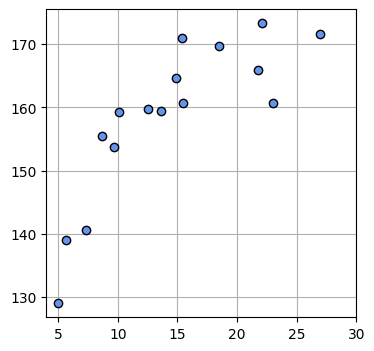

In [4]:
# リスト 5-1-(5)
# データ表示 -----
plt.figure(figsize=(4, 4))
plt.plot(
    X,                        # 入力データ
    T,                        # 目標データ
    "cornflowerblue",         # マーカーを水色にする
    marker="o",               # マーカーの形を o にする
    linestyle="None",         # マーカーを線で結ばない
    markeredgecolor="black",  # マーカーの輪郭を黒にする
)
plt.xlim(X_min, X_max)        # x 軸の範囲を指定
plt.grid()                    # グリッドを表示する
plt.show()

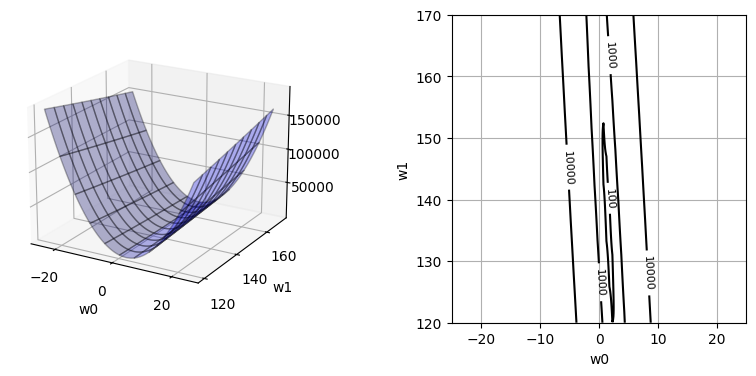

In [10]:
# リスト 5-1-(6)
# 平均二乗誤差（MSE、mean squared error）関数 -----
def mse_line(x, t, w):
    y = w[0] * x + w[1]          # 式 5-4、y を求める
    mse = np.mean((y - t) ** 2)  # 式 5-3、平均二乗誤差
    return mse

# 各 w0、w1 で平均二乗誤差（MSE）を計算 -----
w0_n, w1_n = 100, 100                  # グラフ表示の解像度
w0_min, w0_max = -25, 25               # w0 の計算範囲
w1_min, w1_max = 120, 170              # w1 の計算範囲
w0 = np.linspace(w0_min, w0_max, w0_n) # w0 を準備
w1 = np.linspace(w1_min, w1_max, w1_n) # w1 を準備
J = np.zeros((w1_n, w0_n))             # MSE を入れる配列 J を準備
# グリッド状の点 (w0, w1) に対して J を計算
for i0 in range(w0_n):
    for i1 in range(w1_n):
        w = np.array([w0[i0], w1[i1]])
        J[i1, i0] = mse_line(X, T, w)

ww0, ww1 = np.meshgrid(w0, w1)         # グリッド座標の作成

# グラフ描画 -----
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
# サーフェイス表示
ax = plt.subplot(1, 2, 1, projection="3d")
ax.plot_surface(
    ww0, ww1, J,
    rstride=10, cstride=10, alpha=0.3, color="blue", edgecolor="black",
)
ax.set_xticks([-20, 0, 20])      # x 軸の目盛り指定
ax.set_yticks([120, 140, 160])   # y 軸の目盛り指定
ax.set_xlabel("w0")
ax.set_ylabel("w1")

ax.view_init(20, -60)            # グラフの向き指定

# 等高線表示
plt.subplot(1, 2, 2)
cont = plt.contour(
    ww0, ww1, J, colors="black",
    levels=[100, 1000, 10000, 1000000],    # 描く等高線の値を設定
)
cont.clabel(fmt="%d", fontsize=8)
plt.xlabel("w0")
plt.ylabel("w1")

plt.grid()
plt.show()

In [6]:
# リスト 5-1-(7)
# 平均二乗誤差（MSE）の勾配 -----
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)  # 式 5-9
    d_w1 = 2 * np.mean(y - t)        # 式 5-10
    return d_w0, d_w1

In [7]:
# リスト 5-1-(8)
w = np.array([10, 165])
d_w = dmse_line(X, T, w)
print(np.round(d_w, 2))

[5046.29  301.8 ]


繰り返し回数 13820
w0 = 1.539947, w1 = 136.176160
dMSE = [-0.005794, 0.099991]
MSE = 49.027452
SD = 7.001961 cm


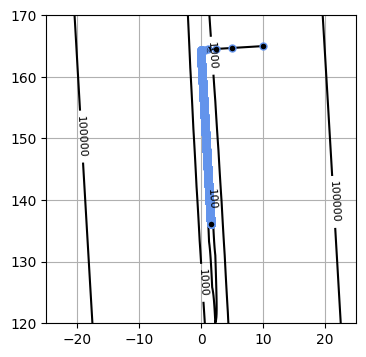

In [16]:
# リスト 5-1-(9)
# 勾配法 -----
def fit_line_num(x, t, w_init):
    # パラメータ
    alpha = 0.001     # 学習率
    tau_max = 100000  # 繰り返しの最大数
    eps = 0.1         # 繰り返し計算を終了するための閾値
    # 勾配法
    w = np.zeros((tau_max + 1, 2))  # 変化する w の履歴を入れる配列
    w[0, :] = w_init                # w の初期値をセット

    for tau in range(tau_max):
        dmse = dmse_line(x, t, w[tau, :])
        w[tau + 1, 0] = w[tau, 0] - alpha * dmse[0]    # 式 5-6
        w[tau + 1, 1] = w[tau, 1] - alpha * dmse[1]    # 式 5-7
        if max(np.absolute(dmse)) < eps:               # 終了判定
            break                                      # tau のループから抜ける

    w_final = w[tau + 1, :]    # 最終的に得られた w
    w_hist = w[:tau + 2, :]    # w の履歴で更新した分を抜き出す、 なぜ +2 ?

    return w_final, dmse, w_hist

# メイン -----
# 勾配法で w を計算
w_init = np.array([10.0, 165.0])                 # w の初期値
w, dmse, w_history = fit_line_num(X, T, w_init)  # w を計算
mse = mse_line(X, T, w)                          # MSE を計算、すごく小さくなっているはず

# 結果表示
print(F"繰り返し回数 {w_history.shape[0] - 1}")
print(F"w0 = {w[0]:.6f}, w1 = {w[1]:.6f}")
print(F"dMSE = [{dmse[0]:.6f}, {dmse[1]:.6f}]")
print(F"MSE = {mse:.6f}")
print(F"SD = {np.sqrt(mse):.6f} cm")

# グラフ描画 -----
plt.figure(figsize=(4, 4))
# 等高線表示
cont = plt.contour(
    ww0, ww1, J,       # リスト 5-1-(6) で作成済み
    colors="black", levels=[100, 1000, 100000, 1000000],
)
cont.clabel(fmt="%1.0f", fontsize=8)

# 等高線の上に、過去のすべての w をプロット
plt.plot(
    w_history[:, 0], w_history[:, 1], "black",
    marker=".",                        # マーカーの形
    markersize=10,                     # マーカーの大きさ
    markeredgecolor="cornflowerblue", # マーカーの輪郭の色
)
plt.grid()
plt.show()

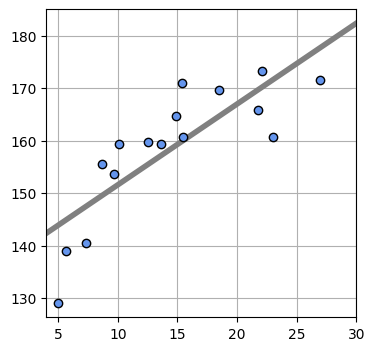

In [17]:
# リスト 5-1-(10)
# グラフ描画 -----
def show_line(w):
    x = np.linspace(X_min, X_max, 100)
    y = w[0] * x + w[1]
    plt.plot(x, y, "gray", linewidth=4)


# メイン -----
# グラフ描画
plt.figure(figsize=(4, 4))
show_line(w) # w は リスト 5-1-(9) で計算済み
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()

w0 = 1.56, w1 = 135.87
MSE = 49.01
SD = 7.00 cm


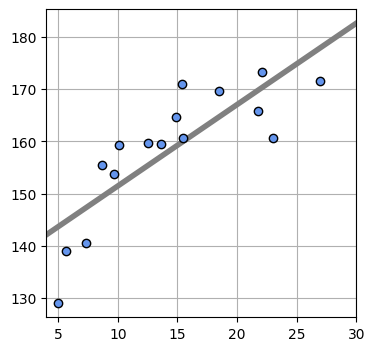

In [19]:
# リスト 5-1-(11)
# 解析解 -----
def fit_line(x, t):
    mx = np.mean(x)                         # <x>
    mt = np.mean(t)                         # <t>
    mtx = np.mean(t * x)                    # <tx>
    mxx = np.mean(x * x)                    # <x^2>
    w0 = (mtx - mt * mx) / (mxx - mx ** 2)  # 式 5-20
    w1 = mt - w0 * mx                       # 式 5-21
    w = np.array([w0, w1])
    return w

# メイン -----
w = fit_line(X, T)       # 解析解で w を計算
mse = mse_line(X, T, w)  # MSE を計算
# 結果表示
print(F"w0 = {w[0]:.2f}, w1 = {w[1]:.2f}")
print(F"MSE = {mse:.2f}")
print(F"SD = {np.sqrt(mse):.2f} cm")

# グラフ描画 -----
plt.figure(figsize=(4, 4))
show_line(w)
plt.plot(
    X, T, "cornflowerblue",
    marker="o", linestyle="None", markeredgecolor="black",
)
plt.xlim(X_min, X_max)
plt.grid()
plt.show()